### 과목명: 딥러닝및실습 hw1_2
##### 실습자: 2017136063 여승준

# a_2d_image_data.py

NxCxHxW : 사진 수 / 사진의 채널수 / 높이 / 너비
(* 3D이미지의 Depth만 빠짐)

In [74]:
import os
import imageio.v2 as imageio
import torch

'''
아래에 imageio.imread()의 인자로 os.path.join()함수를 사용하는데, OS마다 파일지정 형식이 다를 수 있기 때문에 아래와 같은 방법이 절대주소/상대주소나 '..'을 지정해주는 것보다 안정적이다.
'''


img_arr = imageio.imread(os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog", "bobby.jpg"))
print(type(img_arr)) # <class 'numpy.ndarray'>
print(img_arr.shape) # (720, 1280, 3)
print(img_arr.dtype) # uint8

img = torch.from_numpy(img_arr)  # numpy.ndarray -> tensor
out = img.permute(2, 0, 1) # 행과 열의 차원을 바꿔주는 함수 (직접 지정)
print(out.dtype, out.shape) # torch.Size([3, 720, 1280])

<class 'numpy.ndarray'>
(720, 1280, 3)
uint8
torch.uint8 torch.Size([3, 720, 1280])


In [75]:
print("#" * 50, 1)

''' os.path.splittext()는 파일이름과 파일확장자명을 튜플로 반환 '''
data_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")
filenames = [
  name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png'
] 
print(filenames)

from PIL import Image

for i, filename in enumerate(filenames):
  image = Image.open(os.path.join(data_dir, filename))
  image.show()
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  print(img_arr.shape)
  print(img_arr.dtype)

batch_size = 3
'''(배치, 채널, H, W) 순서임을 유의'''
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8) 

for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  img_t = torch.from_numpy(img_arr)
  img_t = img_t.permute(2, 0, 1) # (채널, H, W)
  img_t = img_t[:3] # 알파채널 제거 코드
  batch[i] = img_t # 각 배치마다 하나씩 이미지 가리키게 함

print(batch.shape)

################################################## 1
['cat1.png', 'cat2.png', 'cat3.png']
(256, 256, 3)
uint8
(256, 256, 3)
uint8
(256, 256, 3)
uint8
torch.Size([3, 3, 256, 256])


In [76]:
print("#" * 50, 2)

batch = batch.float()
batch /= 255.0
print(batch.dtype)
print(batch.shape)

n_channels = batch.shape[1] #채널의 개수

'''R,G,B 채널마다 돌면서 각각의 평균값, 표준편차 등을 구하여 저장'''
for c in range(n_channels):
  mean = torch.mean(batch[:, c])
  std = torch.std(batch[:, c])
  batch[:, c] = (batch[:, c] - mean) / std # 정규화

################################################## 2
torch.float32
torch.Size([3, 3, 256, 256])


----------------------------------
# b_3d_image_data.py

NxCxDxHxW : 사진 수 / 사진의 채널수 / 깊이 / 높이 / 너비

In [77]:
import os

import imageio.v2 as imageio

# 여러 3D 사진들이 저장된 폴더
# .dcm = 의료 영상을 배포 및보기를위한 표준
dir_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "c_volumetric-dicom", "2-LUNG_3.0_B70f-04083")

'''
imageio.volread() 함수는 imageio 라이브러리를 사용하여 디렉토리에 있는 DICOM 형식의 의료 이미지 파일들을 읽어들이고, 이를 3D 볼륨(volume) 형태로 반환하는 함수입니다. 이 함수는 주로 의료 이미징 데이터를 처리하고 분석하는 데 사용됩니다.

그럼 99개의 .dcm 파일은 한개의 3D 이미지로 봐야하나, 아니면 Depth가 99인 2D 이미지배열로 봐야하나? ==>같은 말인듯 
'''
vol_array = imageio.volread(dir_path, format='DICOM')
print(type(vol_array))   # >>> <class 'imageio.core.util.Array'>:  Numpy NDArray
print(vol_array.shape)   # >>> (99, 512, 512) (N x C) x D x H x W
print(vol_array.dtype)   # >>> int16
print(vol_array[0]) # 1번째 사진

Reading DICOM (examining files): 99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
<class 'imageio.core.util.Array'>
(99, 512, 512)
int16
[[ -985  -990  -999 ... -1017 -1008  -971]
 [-1016  -984  -963 ... -1000 -1009  -999]
 [-1024 -1008  -996 ...  -979 -1021  -987]
 ...
 [ -920  -942  -944 ...  -893  -917  -955]
 [ -871  -879  -905 ...  -895  -869  -867]
 [ -876  -855  -873 ...  -933  -982  -936]]


################################################## 1


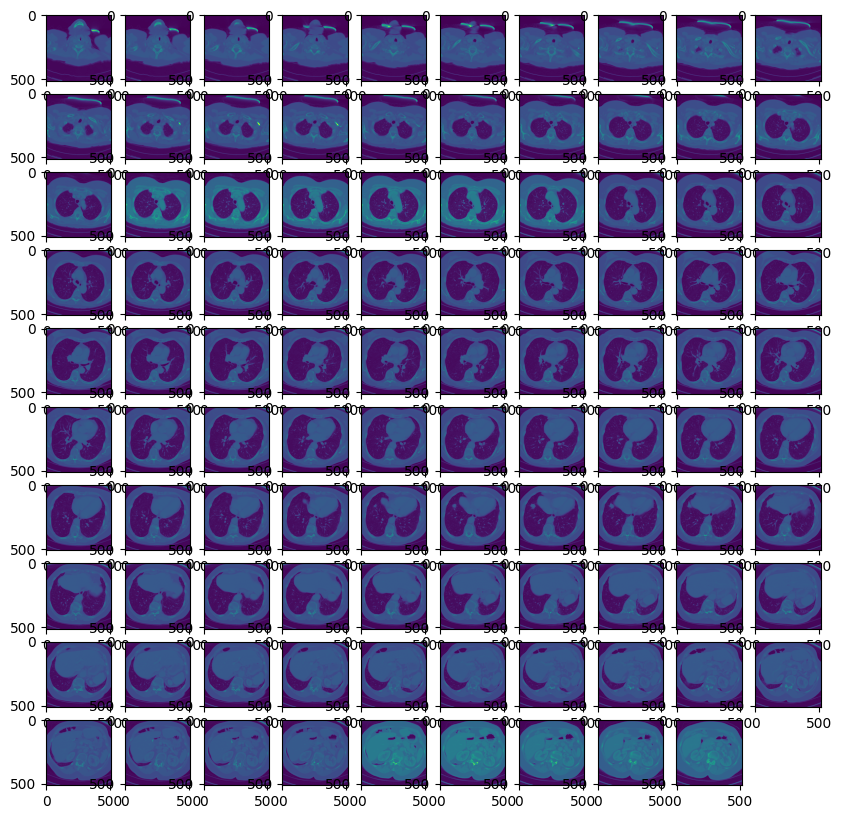

torch.Size([1, 1, 99, 512, 512])


In [78]:
print("#" * 50, 1)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) # 사이즈가 10,10인 그림을 생성
for id in range(0, 99): #매 사진마다
  fig.add_subplot(10, 10, id + 1) # id+1번째 인덱스에 그림 삽입
  plt.imshow(vol_array[id])
plt.show()

import torch

vol = torch.from_numpy(vol_array).float()
vol = torch.unsqueeze(vol, 0)  # channel
vol = torch.unsqueeze(vol, 0)  # data size

print(vol.shape)  # >>> torch.Size([1, 1, 99, 512, 512])

In [79]:
print("#" * 50, 2)

'''
torch.mean, sum, std 는 dimension이 축소됌

keepdim=True: 이 옵션을 사용하면 결과 텐서의 차원 수가 입력 텐서와 동일한 상태로 유지됩니다. 즉, 결과 텐서는 입력 텐서와 동일한 차원 수를 가지며, 차원 크기 중 하나는 1이 될 수 있습니다. 이 옵션을 사용하면 브로드캐스팅 연산에 도움이 됩니다.

keepdim=False (기본값): 이 옵션을 사용하면 결과 텐서는 입력 텐서의 차원 중 크기가 1인 차원이 제거되고, 해당 차원이 없는 텐서로 축소됩니다. 결과 텐서의 차원 수는 입력 텐서보다 1 차원 줄어들 수 있습니다.
'''
mean = torch.mean(vol, dim=(3, 4), keepdim=True)
print(mean.shape) # torch.Size([1, 1, 99, 1, 1])
std = torch.std(vol, dim=(3, 4), keepdim=True)
print(std.shape) # torch.Size([1, 1, 99, 1, 1])
vol = (vol - mean) / std
print(vol.shape)

print(vol[0, 0, 0])

keepdim_test = torch.mean(vol, dim=(3,4), keepdim=False)
print(keepdim_test.shape) # torch.Size([1,1,99])

################################################## 2
torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 512, 512])
tensor([[-1.0002, -1.0102,  ..., -1.0464, -0.9720],
        [-1.0625, -0.9982,  ..., -1.0484, -1.0283],
        ...,
        [-0.7711, -0.7872,  ..., -0.7671, -0.7631],
        [-0.7812, -0.7390,  ..., -0.9941, -0.9017]])
torch.Size([1, 1, 99])


------------------------
# c_tabular_wine_data.py
한 행당 샘플을 나타내는 테이블(표) 데이터.
한 열마다 특징값을 나타냄.
쉽게 생각해서 엑셀 표를 생각하면 된다. 
<br><br>
#### NxF : 데이터크기 x 특징값(피쳐) 수
보통 마지막 column에 target(예측값)을 설정함.
마지막 column을 제외한 나머지 열에 대한 data들을 학습시켜 가장 유의미한 target을 예측해야 함
<br><br>

In [80]:
import csv
import os
import numpy as np


'''
csv : Comma Seperated Values
주로 ',' , ';' 등으로 구분 됌
delimiter = ";" ==> ';'으로 데이터 구분
skiprows=1 ==> 첫 카테고리 문자열 행은 데이터가 아님 (skip) 
'''

wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
print(wineq_numpy.dtype)
print(wineq_numpy.shape) # (4898, 12)
print(wineq_numpy)
print()

col_list = next(csv.reader(open(wine_path), delimiter=';')) # iterator 반환 
print(col_list)
print()

float32
(4898, 12)
[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [81]:
print("#" * 50, 1)

import torch

wineq = torch.from_numpy(wineq_numpy)
print(wineq.dtype)
print(wineq.shape) #torch.Size([4898, 12])
print()

data = wineq[:, :-1]  # Selects all rows and all columns except the last
print(data.dtype)
print(data.shape)
print(data)
print()

target = wineq[:, -1]  # Selects all rows and the last column
print(target.dtype)
print(target.shape) # torch.Size([4898])
print(target)
print()

target = target.long()  # treat labels as an integer
print(target.dtype)
print(target.shape)
print(target)
print()

################################################## 1
torch.float32
torch.Size([4898, 12])

torch.float32
torch.Size([4898, 11])
tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
        ...,
        [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]])

torch.float32
torch.Size([4898])
tensor([6., 6.,  ..., 7., 6.])

torch.int64
torch.Size([4898])
tensor([6, 6,  ..., 7, 6])


In [82]:
print("#" * 50, 2)

'''왜 피쳐값이 11개가 아니고 10개지? 아마 id같은 피쳐는 활용 안하려고 그런가?'''
eye_matrix = torch.eye(10)
# We use the 'target' tensor as indices to extract the corresponding rows from the identity matrix
# It can generate the one-hot vectors for each element in the 'target' tensor
onehot_target = eye_matrix[target]

print(onehot_target.shape)  # >>> torch.Size([4898, 10])
print(onehot_target[0])
print(onehot_target[1])
print(onehot_target[-2])
print(onehot_target)

################################################## 2
torch.Size([4898, 10])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])


In [83]:
print("#" * 50, 3)

'''keepdim=False가 디폴트라서 mean, var 연산 후 dimension이 줄어듦을 확인할 수 있다.'''

data_mean = torch.mean(data, dim=0) #(4898, 11)
data_var = torch.var(data, dim=0) #분산
data = (data - data_mean) / torch.sqrt(data_var) # 정규화
print(data_mean.shape) #Size([11])
print(data)

################################################## 3
torch.Size([11])
tensor([[ 1.7208e-01, -8.1761e-02,  ..., -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  ...,  1.3422e-03, -8.2419e-01],
        ...,
        [-1.6054e+00,  1.1666e-01,  ..., -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]])


In [84]:
print("#" * 50, 4)

# scikit-learn이라는 유명 패키지
from sklearn.model_selection import train_test_split

'''
# data : Size([4898,11])
# onehot_target : Size([4898,10])
# test_size=0.2 : train(80%), test(20%) 
'''
X_train, X_valid, y_train, y_valid = train_test_split(data, onehot_target, test_size=0.2)

'''
y의 column값이 10인 이유: onehot-encoding
'''
print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

################################################## 4
torch.Size([3918, 11])
torch.Size([3918, 10])
torch.Size([980, 11])
torch.Size([980, 10])


In [85]:
# 그동안 배운 것 응용한 함수
def get_wine_data():
  wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
  wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

  wineq = torch.from_numpy(wineq_numpy)

  data = wineq[:, :-1]  # Selects all rows and all columns except the last
  target = wineq[:, -1].long()  # treat labels as an integer

  eye_matrix = torch.eye(10)
  onehot_target = eye_matrix[target]

  data_mean = torch.mean(data, dim=0)
  data_var = torch.var(data, dim=0)
  data = (data - data_mean) / torch.sqrt(data_var) #정규화

  X_train, X_valid, y_train, y_valid = train_test_split(data, onehot_target, test_size=0.2)

  return X_train, X_valid, y_train, y_valid

# d_tabular_california_housing.py

In [86]:
# https://medium.com/analytics-vidhya/implement-linear-regression-on-boston-housing-dataset-by-pytorch-c5d29546f938
# https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
import torch
from sklearn.datasets import fetch_california_housing

'''
캘리포니아 부동산에 관한 유명한 데이터셋 분석
'''
housing = fetch_california_housing()
print(housing.keys())

print(type(housing.data))
print(housing.data.dtype)
print(housing.data.shape)
print(housing.feature_names)

print(housing.target.shape)
print(housing.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'numpy.ndarray'>
float64
(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640,)
['MedHouseVal']


In [87]:
print("#" * 50, 1)

import numpy as np

print(housing.data.min(), housing.data.max())

# axis=0 : 각 열마다 (feature마다) 계산
data_mean = np.mean(housing.data, axis=0)
data_var = np.var(housing.data, axis=0)
data = (housing.data - data_mean) / np.sqrt(data_var) # 정규화
target = housing.target

print(housing.data.shape)
print(data_mean.shape)
print(data.min(), data.max())

################################################## 1
-124.35 35682.0
(20640, 8)
(8,)
-2.3859923416733877 119.41910318829312


In [88]:
print("#" * 50, 2)

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2)

X_train = torch.from_numpy(X_train)
X_valid = torch.from_numpy(X_valid)
y_train = torch.from_numpy(y_train)
y_valid = torch.from_numpy(y_valid)

print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

################################################## 2
torch.Size([16512, 8])
torch.Size([16512])
torch.Size([4128, 8])
torch.Size([4128])


# e_time_series_data.py

NxLxF
 :N(Data size), L(Length==hours), F(Features)
 
이벤트 기준 : 정량적 시간 간격 x
시간 기준 : 정량적 시간 간격

In [89]:
import os
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

bikes_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

bikes_numpy = np.loadtxt(
  fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
  converters={
    1: lambda x: float(x[8:10])  # 2011-01-07 --> 07 --> 7.0
  }
)
'''converters 문 : 일자별로 자름'''
bikes = torch.from_numpy(bikes_numpy)
print(bikes.shape)
print(bikes)

daily_bikes = bikes.view(-1, 24, bikes.shape[1])
print(daily_bikes.shape)  # >>> torch.Size([730, 24, 17]) 
# N(size) x L(hrs) x F(features)

daily_bikes_data = daily_bikes[:, :, :-1]
daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1) #차원을 동일하게 맞춰줌

print(daily_bikes_data.shape)
print(daily_bikes_target.shape)


torch.Size([17520, 17])
tensor([[1.0000e+00, 1.0000e+00,  ..., 1.3000e+01, 1.6000e+01],
        [2.0000e+00, 1.0000e+00,  ..., 3.2000e+01, 4.0000e+01],
        ...,
        [1.7378e+04, 3.1000e+01,  ..., 4.8000e+01, 6.1000e+01],
        [1.7379e+04, 3.1000e+01,  ..., 3.7000e+01, 4.9000e+01]])
torch.Size([730, 24, 17])
torch.Size([730, 24, 16])
torch.Size([730, 24, 1])


In [90]:
print("#" * 50, 1)

first_day_data = daily_bikes_data[0]
print(first_day_data.shape) # torch.Size([24, 13])

'''정량데이터 - 카테고리 - NomialData (not ordinal)'''
# Whether situation: 1: clear, 2:mist, 3: light rain/snow, 4: heavy rain/snow
print(first_day_data[:, 9].long()) #9th feature인 weather situation을 가져온다. (24h 모든 데이터를) ==> Size(24,1)
eye_matrix = torch.eye(4) # 단위행렬
print(eye_matrix)

weather_onehot = eye_matrix[first_day_data[:, 9].long() - 1]
print(weather_onehot.shape) #Size(24,4)
print(weather_onehot)

first_day_data_torch = torch.cat(tensors=(first_day_data, weather_onehot), dim=1)
# cat([Size(24,16), Size(24,4)], dim=1)
# ==> Size(24,20)
print(first_day_data_torch.shape) # ==> Size(24,17)
print(first_day_data_torch)

################################################## 1
torch.Size([24, 16])
tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
torch.Size([24, 4])
tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])
torch.Size([24, 20])
tensor([[ 1.,  1.,  ...,  0.,  0.],
        [ 2.,  1.,  ...,  0.,  0.],
        ...,
        [23.,  1.,  ...,  0.,  0.],
        [24.,  1.,  ...,  0.,  0.]])


In [91]:
print("#" * 50, 2)

day_data_torch_list = []
for daily_idx in range(daily_bikes_data.shape[0]):  # range(730)
  day = daily_bikes_data[daily_idx]  # day.shape: [24, 13]
  weather_onehot = eye_matrix[day[:, 9].long() - 1] #[(24,4)]
  # print(day.shape, weather_onehot.shape, sep="\n")
  day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  # day_torch.shape: [24, 20]
  day_data_torch_list.append(day_data_torch)

print(len(day_data_torch_list))
daily_bikes_data = torch.stack(day_data_torch_list, dim=0)
print(daily_bikes_data.shape)

################################################## 2
730
torch.Size([730, 24, 20])


In [92]:
print("#" * 50, 3)

print(daily_bikes_data[:, :, :9].shape, daily_bikes_data[:, :, 10:].shape)
daily_bikes_data = torch.cat(
  [daily_bikes_data[:, :, :9], daily_bikes_data[:, :, 10:]],
  dim=2
)
print(daily_bikes_data.shape)

temperatures = daily_bikes_data[:, :, 9] # >>> torch.Size([730, 17])
daily_bikes_data[:, :, 9] = (daily_bikes_data[:, :, 9] - torch.mean(temperatures)) / torch.std(temperatures)

# daily_bikes_data = daily_bikes_data.transpose(1, 2)
print(daily_bikes_data.shape)  # >>> torch.Size([730, 17, 24])


################################################## 3
torch.Size([730, 24, 9]) torch.Size([730, 24, 10])
torch.Size([730, 24, 19])
torch.Size([730, 24, 19])


# f_audio_data.py

NxCxL : (Size) x (Channel) x (Length)
 
spectrogram : 오디오 신호나 소리의 주파수와 시간에 대한 시각적 표현
NxCxFxT : (Size) x (Channel) x (Freq) x (Time)

In [93]:
import torch
import os
import scipy.io.wavfile as wavfile

audio_1_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100038-A-14.wav")
audio_2_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100210-A-36.wav")

freq_1, waveform_arr_1 = wavfile.read(audio_1_path)
print(freq_1) # 44100
print(type(waveform_arr_1))
print(len(waveform_arr_1)) # 220_500 <== 44100 * 5s
print(waveform_arr_1)

freq_2, waveform_arr_2 = wavfile.read(audio_2_path)

# 
# '_'언더스코어로 가독성 좋은 수 표현
waveform = torch.empty(2, 1, 220_500)

waveform[0, 0] = torch.from_numpy(waveform_arr_1).float()
waveform[1, 0] = torch.from_numpy(waveform_arr_2).float()
print(waveform.shape)

44100
<class 'numpy.ndarray'>
220500
[ -388 -3387 -4634 ...  2289  1327    90]
torch.Size([2, 1, 220500])


In [94]:
print("#" * 50, 1)

from scipy import signal

_, _, sp_arr_1 = signal.spectrogram(waveform_arr_1, freq_1)
_, _, sp_arr_2 = signal.spectrogram(waveform_arr_2, freq_2)

sp_1 = torch.from_numpy(sp_arr_1)
sp_2 = torch.from_numpy(sp_arr_2)
print(sp_1.shape) # torch.Size([129, 984]) <== Frequency & time
print(sp_2.shape) # torch.Size([129, 984]) <== Frequency & time

sp_left_t = torch.from_numpy(sp_arr_1)
sp_right_t = torch.from_numpy(sp_arr_2)
print(sp_left_t.shape) # torch.Size([129, 984])
print(sp_right_t.shape) # torch.Size([129, 984])

sp_t = torch.stack((sp_left_t, sp_right_t), dim=0).unsqueeze(dim=0)
print(sp_t.shape) # torch.Size([1, 2, 129, 984])

################################################## 1
torch.Size([129, 984])
torch.Size([129, 984])
torch.Size([129, 984])
torch.Size([129, 984])
torch.Size([1, 2, 129, 984])


# g_video_data.py

NxCxTxHxW : (Size) x (Channel) x (Time=frame) x (Height) x (Width)
 
* pip install imageio[ffmpeg] 설치 필요
* ffmpeg : A complete, cross-platform solution to record, convert and stream audio and video

In [95]:
# pip install imageio[ffmpeg]
import torch
import os
import imageio

video_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "g_video-cockatoo", "cockatoo.mp4")

reader = imageio.get_reader(video_path)
print(type(reader)) # <class 'imageio.plugins.ffmpeg.FfmpegFormat.Reader'>
meta = reader.get_meta_data()
print(meta)

for i, frame in enumerate(reader):
  frame = torch.from_numpy(frame).float()  # frame.shape: [360, 480, 3]
  # print(i, frame.shape)   # i, torch.Size([360, 480, 3])

n_channels = 3
n_frames = 529
video = torch.empty(1, n_frames, n_channels, *meta['size'])  # (1, 529, 3, 480, 360)
print(video.shape)


for i, frame in enumerate(reader):
  frame = torch.from_numpy(frame).float()       # frame.shape: [360, 480, 3]
  frame = torch.permute(frame, dims=(2, 1, 0))  # frame.shape: [3, 480, 360]
  video[0, i] = frame

video = video.permute(dims=(0, 2, 1, 3, 4)) # [1, 3, 529, 480, 360]
print(video.shape)

<class 'imageio.plugins.ffmpeg.FfmpegFormat.Reader'>
{'plugin': 'ffmpeg', 'nframes': inf, 'ffmpeg_version': '4.2.2 built with gcc 9.2.1 (GCC) 20200122', 'codec': 'h264', 'pix_fmt': 'yuv420p(tv, bt709)', 'audio_codec': 'aac', 'fps': 29.53, 'source_size': (480, 360), 'size': (480, 360), 'rotate': 0, 'duration': 17.93}
torch.Size([1, 529, 3, 480, 360])
torch.Size([1, 3, 529, 480, 360])


---------------------------------------------------------
# h_linear_regression_dataset_dataloader.py

##### torch.utils.data.Dataset
- stores data samples and expected target values (labels)
- returns one sample at a time 
##### torch.utils.data.Dataloader
- groups data in batches, iterate them, and enable multi-processing


[usage]
- Dataset 재정의 시 __init__, __len__, __getitem__ 을 재정의 해줘야 함 (필수적 권장)
- DataLoader 의 매개변수
  - batch_size : 배치 크기 지정
  - shuffle : 매 epoch마다 overfitting을 줄이기 위해서 데이터를 섞을지 말지 결정
    - training 데이터셋에 대해서는 true
    - testing 데이터셋에 대해서는 false
  - num_workers : multi-processor 수 (default: 0)
  - drop_last : 배치 사이즈에 따라서 마지막 배치의 record 수가 적을수도 있고 클 수도 있다. 그에 따라서 이것이 훈련에 도움이 될수도 있고, 오히려 악영향을 끼칠 수도 있다. 이를 결정하는 것이다. (소수의 잘못된 데이터를 학습하면 학습효과가 떨어진다. 반면에 버려지는 데이터가 아까우니 조금의 훈련이라도 더 하면 좋지 않느냐는 생각도 있다.)

In [96]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

'''커스텀 Dataset 정의'''
class LinearRegressionDataset(Dataset):
  def __init__(self, N=50, m=-3, b=2, *args, **kwargs):
    # N: number of samples, e.g. 50
    # m: slope
    # b: offset
    super().__init__(*args, **kwargs)

    self.x = torch.rand(N, 2) # 균등 분포
    self.noise = torch.rand(N) * 0.2
    self.m = m
    self.b = b
    self.y = (torch.sum(self.x * self.m) + self.b + self.noise).unsqueeze(-1)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return {'input': self.x[idx], 'target': self.y[idx]}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.x), self.x.shape, self.y.shape
    )
    return str


if __name__ == "__main__":
  linear_regression_dataset = LinearRegressionDataset()

  print(linear_regression_dataset)

  print("#" * 50, 1)

  for idx, sample in enumerate(linear_regression_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'], sample['target']))

  train_dataset, validation_dataset, test_dataset = random_split(linear_regression_dataset, [0.7, 0.2, 0.1])

  print("#" * 50, 2)

  ''' random_split() 으로 7:2:1 비율로 데이터가 잘 나뉘었는지 확인 '''
  print(len(train_dataset), len(validation_dataset), len(test_dataset))

  print("#" * 50, 3)

  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=4,
    shuffle=True # train_dataset에는 shuffle ON
  )

  '''DataLoader 출력 결과, 배치사이즈 4임을 확인'''
  for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'], batch['target']))


Data Size: 50, Input Shape: torch.Size([50, 2]), Target Shape: torch.Size([50, 1])
################################################## 1
0 - tensor([0.0012, 0.8007]): tensor([-129.6715])
1 - tensor([0.9748, 0.1679]): tensor([-129.6225])
2 - tensor([0.1094, 0.3135]): tensor([-129.7599])
3 - tensor([0.8146, 0.7504]): tensor([-129.7011])
4 - tensor([0.1475, 0.0339]): tensor([-129.7428])
5 - tensor([0.7983, 0.0063]): tensor([-129.6457])
6 - tensor([0.9639, 0.2219]): tensor([-129.6549])
7 - tensor([0.1419, 0.3633]): tensor([-129.7920])
8 - tensor([0.0428, 0.5913]): tensor([-129.7909])
9 - tensor([0.3879, 0.4324]): tensor([-129.6882])
10 - tensor([0.6683, 0.8295]): tensor([-129.6276])
11 - tensor([0.2967, 0.4078]): tensor([-129.6678])
12 - tensor([0.0156, 0.8997]): tensor([-129.7223])
13 - tensor([0.6219, 0.6569]): tensor([-129.7310])
14 - tensor([0.2801, 0.1268]): tensor([-129.6829])
15 - tensor([0.0579, 0.0923]): tensor([-129.8092])
16 - tensor([0.6691, 0.2078]): tensor([-129.6797])
17 - te

# i_2d_image_dataset_dataloader.py

Dog&Cat 2D Image Dataset Example

In [97]:
import os

import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms


class DogCat2DImageDataset(Dataset):
  def __init__(self):
    self.image_transforms = transforms.Compose([
      transforms.Resize(size=(256, 256)),
      transforms.ToTensor()
    ]) # 이미지 변환에 필요한 함수 목록 정의

    dogs_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog")
    cats_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")


    # bobby.jpg 같은 경우, resize() 필요
    # 모든 image들을 numpy -> tensor로 만들어줘야
    image_lst = [
      Image.open(os.path.join(dogs_dir, "bobby.jpg")),  # (1280, 720, 3)
      Image.open(os.path.join(cats_dir, "cat1.png")),  # (256, 256, 3)
      Image.open(os.path.join(cats_dir, "cat2.png")),  # (256, 256, 3)
      Image.open(os.path.join(cats_dir, "cat3.png"))  # (256, 256, 3)
    ]

    image_lst = [self.image_transforms(img) for img in image_lst]
    
    self.images = torch.stack(image_lst, dim=0) #[4, 3, 256, 256]
    

    # 0: "dog", 1: "cat"
    self.image_labels = torch.tensor([[0], [1], [1], [1]])

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    return {'input': self.images[idx], 'target': self.image_labels[idx]}

  # print()시 객체정보 출력
  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.images), self.images.shape, self.image_labels.shape
    )
    return str

In [98]:

if __name__ == "__main__":
  dog_cat_2d_image_dataset = DogCat2DImageDataset()

  print(dog_cat_2d_image_dataset)

  print("#" * 50, 1)

  for idx, sample in enumerate(dog_cat_2d_image_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target']))

  train_dataset, test_dataset = random_split(dog_cat_2d_image_dataset, [0.7, 0.3])

  print("#" * 50, 2)

  print(len(train_dataset), len(test_dataset))

  print("#" * 50, 3)

  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=2,
    shuffle=True
  )

  for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target']))


Data Size: 4, Input Shape: torch.Size([4, 3, 256, 256]), Target Shape: torch.Size([4, 1])
################################################## 1
0 - torch.Size([3, 256, 256]): tensor([0])
1 - torch.Size([3, 256, 256]): tensor([1])
2 - torch.Size([3, 256, 256]): tensor([1])
3 - torch.Size([3, 256, 256]): tensor([1])
################################################## 2
3 1
################################################## 3
0 - torch.Size([2, 3, 256, 256]): tensor([[1],
        [1]])
1 - torch.Size([1, 3, 256, 256]): tensor([[1]])


------------------------
# j_wine_dataset_dataloader.py

In [99]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split


class WineDataset(Dataset):
  def __init__(self):
    wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
    wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
    wineq = torch.from_numpy(wineq_numpy)

    data = wineq[:, :-1]  # Selects all rows and all columns except the last
    data_mean = torch.mean(data, dim=0)
    data_var = torch.var(data, dim=0)
    self.data = (data - data_mean) / torch.sqrt(data_var)

    target = wineq[:, -1].long()  # treat labels as an integer
    eye_matrix = torch.eye(10)
    self.target = eye_matrix[target]

    assert len(self.data) == len(self.target)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    wine_feature = self.data[idx]
    wine_target = self.target[idx]
    return {'input': wine_feature, 'target': wine_target}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.data), self.data.shape, self.target.shape
    )
    return str

In [100]:

if __name__ == "__main__":
  wine_dataset = WineDataset()

  print(wine_dataset)

  print("#" * 50, 1)

  for idx, sample in enumerate(wine_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target'].shape))

  train_dataset, validation_dataset, test_dataset = random_split(wine_dataset, [0.7, 0.2, 0.1])

  print("#" * 50, 2)

  print(len(train_dataset), len(validation_dataset), len(test_dataset))

  print("#" * 50, 3)

  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True
  )

  for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))


Data Size: 4898, Input Shape: torch.Size([4898, 11]), Target Shape: torch.Size([4898, 10])
################################################## 1
0 - torch.Size([11]): torch.Size([10])
1 - torch.Size([11]): torch.Size([10])
2 - torch.Size([11]): torch.Size([10])
3 - torch.Size([11]): torch.Size([10])
4 - torch.Size([11]): torch.Size([10])
5 - torch.Size([11]): torch.Size([10])
6 - torch.Size([11]): torch.Size([10])
7 - torch.Size([11]): torch.Size([10])
8 - torch.Size([11]): torch.Size([10])
9 - torch.Size([11]): torch.Size([10])
10 - torch.Size([11]): torch.Size([10])
11 - torch.Size([11]): torch.Size([10])
12 - torch.Size([11]): torch.Size([10])
13 - torch.Size([11]): torch.Size([10])
14 - torch.Size([11]): torch.Size([10])
15 - torch.Size([11]): torch.Size([10])
16 - torch.Size([11]): torch.Size([10])
17 - torch.Size([11]): torch.Size([10])
18 - torch.Size([11]): torch.Size([10])
19 - torch.Size([11]): torch.Size([10])
20 - torch.Size([11]): torch.Size([10])
21 - torch.Size([11]): tor

----------------------------------------
# k_california_housing_dataset_dataloader.py

In [101]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split


class CaliforniaHousingDataset(Dataset):
  def __init__(self):
    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()
    data_mean = np.mean(housing.data, axis=0)
    data_var = np.var(housing.data, axis=0)
    self.data = torch.tensor((housing.data - data_mean) / np.sqrt(data_var), dtype=torch.float32)
    self.target = torch.tensor(housing.target, dtype=torch.float32).unsqueeze(dim=-1)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    sample_data = self.data[idx]
    sample_target = self.target[idx]
    return {'input': sample_data, 'target': sample_target}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.data), self.data.shape, self.target.shape
    )
    return str


In [102]:
if __name__ == "__main__":
  california_housing_dataset = CaliforniaHousingDataset()

  print(california_housing_dataset)

  print("#" * 50, 1)

  for idx, sample in enumerate(california_housing_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target'].shape))

  train_dataset, validation_dataset, test_dataset = random_split(california_housing_dataset, [0.7, 0.2, 0.1])

  print("#" * 50, 2)

  print(len(train_dataset), len(validation_dataset), len(test_dataset))

  print("#" * 50, 3)

  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True
  )

  for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))


Data Size: 20640, Input Shape: torch.Size([20640, 8]), Target Shape: torch.Size([20640, 1])
################################################## 1
0 - torch.Size([8]): torch.Size([1])
1 - torch.Size([8]): torch.Size([1])
2 - torch.Size([8]): torch.Size([1])
3 - torch.Size([8]): torch.Size([1])
4 - torch.Size([8]): torch.Size([1])
5 - torch.Size([8]): torch.Size([1])
6 - torch.Size([8]): torch.Size([1])
7 - torch.Size([8]): torch.Size([1])
8 - torch.Size([8]): torch.Size([1])
9 - torch.Size([8]): torch.Size([1])
10 - torch.Size([8]): torch.Size([1])
11 - torch.Size([8]): torch.Size([1])
12 - torch.Size([8]): torch.Size([1])
13 - torch.Size([8]): torch.Size([1])
14 - torch.Size([8]): torch.Size([1])
15 - torch.Size([8]): torch.Size([1])
16 - torch.Size([8]): torch.Size([1])
17 - torch.Size([8]): torch.Size([1])
18 - torch.Size([8]): torch.Size([1])
19 - torch.Size([8]): torch.Size([1])
20 - torch.Size([8]): torch.Size([1])
21 - torch.Size([8]): torch.Size([1])
22 - torch.Size([8]): torch.S

---------------------------------------------------
# l_time_series_dataset_dataloader.py

In [103]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split


class BikesDataset(Dataset):
  def __init__(self):
    bikes_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

    bikes_numpy = np.loadtxt(
      fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
      converters={
        1: lambda x: float(x[8:10])  # 2011-01-07 --> 07 --> 7
      }
    )
    bikes = torch.from_numpy(bikes_numpy)

    daily_bikes = bikes.view(-1, 24, bikes.shape[1])  # daily_bikes.shape: torch.Size([730, 24, 17])
    self.daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1)

    self.daily_bikes_data = daily_bikes[:, :, :-1]
    eye_matrix = torch.eye(4)

    day_data_torch_list = []
    for daily_idx in range(self.daily_bikes_data.shape[0]):  # range(730)
      day = self.daily_bikes_data[daily_idx]  # day.shape: [24, 17]
      weather_onehot = eye_matrix[day[:, 9].long() - 1]
      day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  # day_torch.shape: [24, 21]
      day_data_torch_list.append(day_data_torch)

    self.daily_bikes_data = torch.stack(day_data_torch_list, dim=0)

    self.daily_bikes_data = torch.cat(
      [self.daily_bikes_data[:, :, :9], self.daily_bikes_data[:, :, 10:]], dim=2
    )

    temperatures = self.daily_bikes_data[:, :, 9]
    self.daily_bikes_data[:, :, 9] = \
      (self.daily_bikes_data[:, :, 9] - torch.mean(temperatures)) / torch.std(temperatures)

    assert len(self.daily_bikes_data) == len(self.daily_bikes_target)

  def __len__(self):
    return len(self.daily_bikes_data)

  def __getitem__(self, idx):
    bike_feature = self.daily_bikes_data[idx]
    bike_target = self.daily_bikes_target[idx]
    return {'input': bike_feature, 'target': bike_target}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.daily_bikes_data), self.daily_bikes_data.shape, self.daily_bikes_target.shape
    )
    return str

In [104]:
if __name__ == "__main__":
  bikes_dataset = BikesDataset()
  print(bikes_dataset)

  print("#" * 50, 1)

  for idx, sample in enumerate(bikes_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target'].shape))

  train_dataset, validation_dataset, test_dataset = random_split(bikes_dataset, [0.7, 0.2, 0.1])

  print("#" * 50, 2)

  print(len(train_dataset), len(validation_dataset), len(test_dataset))

  print("#" * 50, 3)

  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True
  )

  for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))


Data Size: 730, Input Shape: torch.Size([730, 24, 19]), Target Shape: torch.Size([730, 24, 1])
################################################## 1
0 - torch.Size([24, 19]): torch.Size([24, 1])
1 - torch.Size([24, 19]): torch.Size([24, 1])
2 - torch.Size([24, 19]): torch.Size([24, 1])
3 - torch.Size([24, 19]): torch.Size([24, 1])
4 - torch.Size([24, 19]): torch.Size([24, 1])
5 - torch.Size([24, 19]): torch.Size([24, 1])
6 - torch.Size([24, 19]): torch.Size([24, 1])
7 - torch.Size([24, 19]): torch.Size([24, 1])
8 - torch.Size([24, 19]): torch.Size([24, 1])
9 - torch.Size([24, 19]): torch.Size([24, 1])
10 - torch.Size([24, 19]): torch.Size([24, 1])
11 - torch.Size([24, 19]): torch.Size([24, 1])
12 - torch.Size([24, 19]): torch.Size([24, 1])
13 - torch.Size([24, 19]): torch.Size([24, 1])
14 - torch.Size([24, 19]): torch.Size([24, 1])
15 - torch.Size([24, 19]): torch.Size([24, 1])
16 - torch.Size([24, 19]): torch.Size([24, 1])
17 - torch.Size([24, 19]): torch.Size([24, 1])
18 - torch.Size(

---------------------------------
# 숙제후기

- 교수님께서 기본기와 shape 찍어보는 걸 많이 강조하셨는데 차원이 많아질수록 복잡해지는 걸 보니 왜 그런 말씀을 하셨는지 알 수 있었다. (그리고 새로운걸 더 배울수록 점점 기초적인 것을 까먹을 것 같아서 기본기에 미리 많이 익숙해져야겠다)
- 코드의 질이 참 훌륭하고, 교안이 좋아서 교수
- 이론만 배우고 "자 됐죠? 알아서 코딩해오세요" 하는 방식보다 이렇게 충분한 레퍼런스를 받고 어떻게 이를 응용해서 적용시킬 수 있는지를 과제로 내주셨으면 좋겠다. 코드를 보면 이해가 잘 간다. 처음부터 코드를 이렇게 짜라고 하면 무척 헤멜 것 같다.